In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud

In [2]:
data = pd.read_excel('titanic3.xls')

In [3]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
#remove any row that had any thing other than 0,1 in the survived coulmn
data = data[(data['survived'] == 0) | (data['survived'] == 1)]

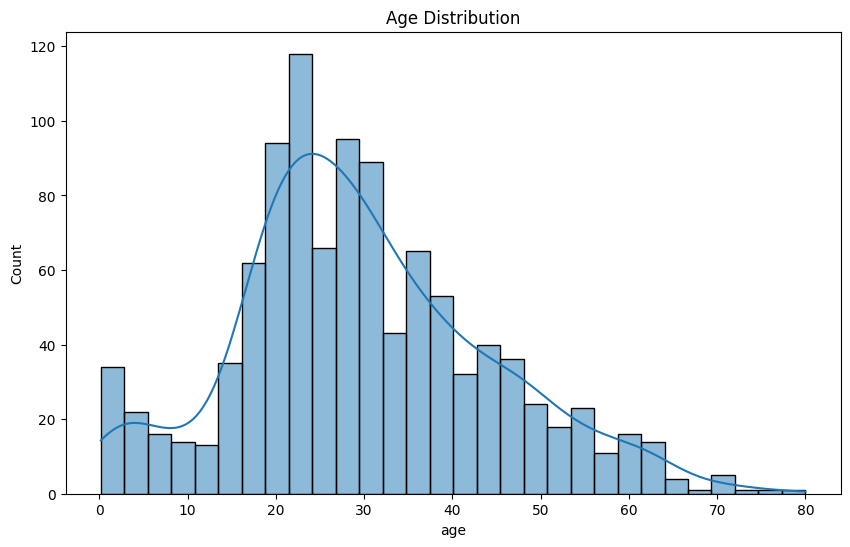

In [5]:
#plot age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [6]:
data['age'].fillna(data['age'].median(), inplace=True)

/tmp/ipykernel_777/1800179019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


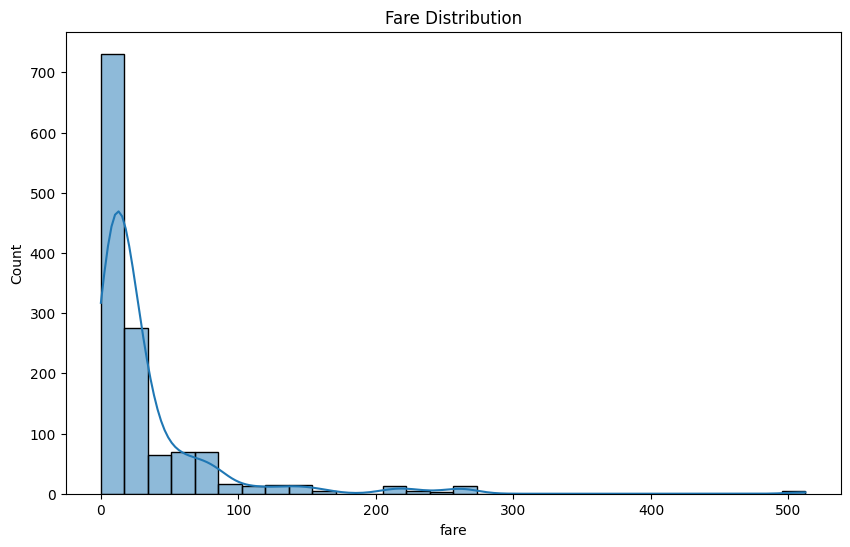

In [7]:
#plot fare distribution
plt.figure(figsize=(10,6))
sns.histplot(data['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

In [8]:
#count poeple with fare = 0
data[data['fare'] == 0].shape[0]

17

In [9]:
data['fare'].fillna(data['fare'].median(), inplace=True)

/tmp/ipykernel_777/193162874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fare'].fillna(data['fare'].median(), inplace=True)


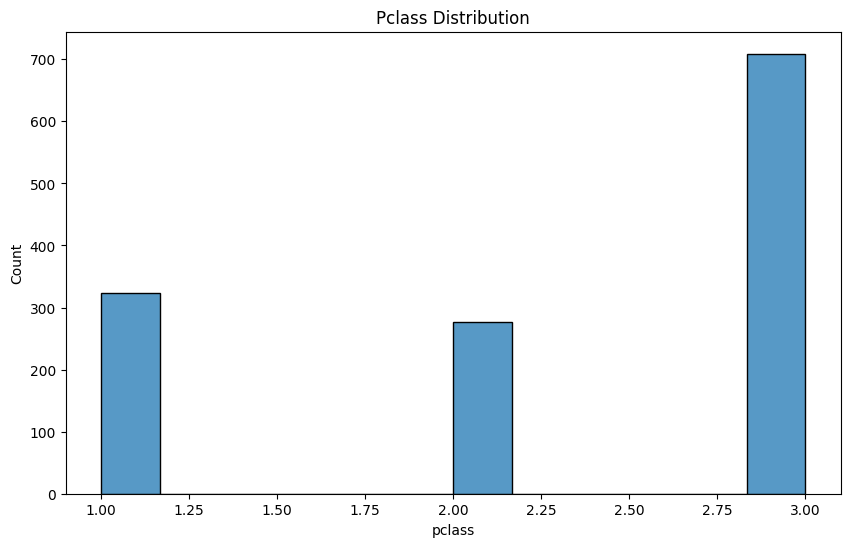

In [10]:
#plot pclass distribution bars next to each other
plt.figure(figsize=(10,6))
sns.histplot(data['pclass'])
plt.title('Pclass Distribution')
plt.show()

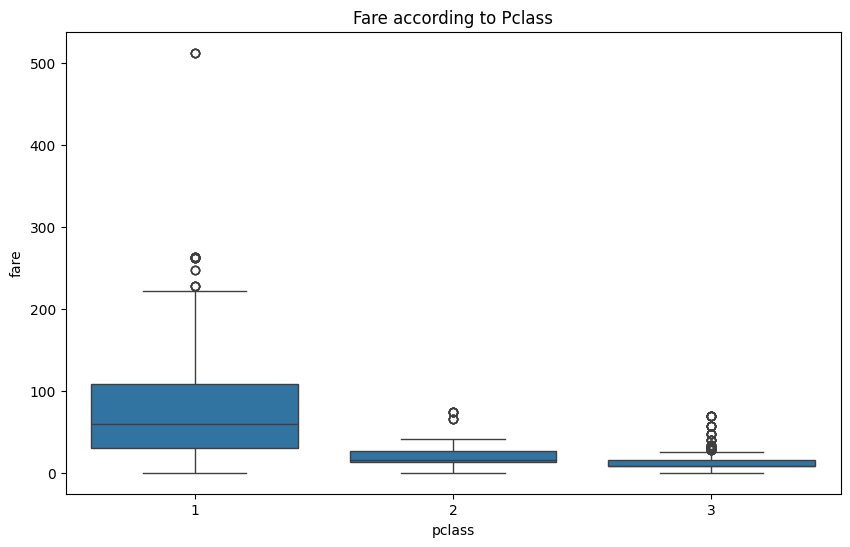

In [11]:
#plot fare according to pclass
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='fare', data=data)
plt.title('Fare according to Pclass')
plt.show()

In [12]:
#print row with highst fare
data[data['fare'] == data['fare'].max()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


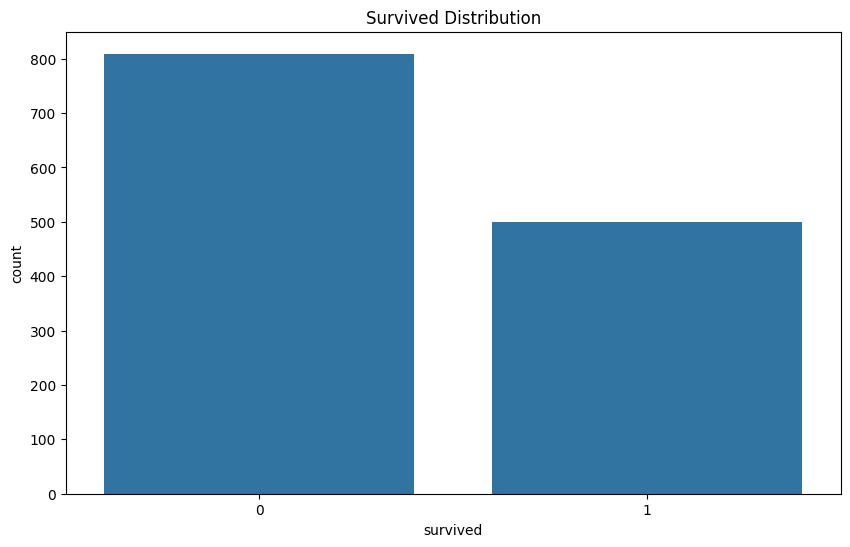

In [13]:
#plot survived distribution pars next to each other
plt.figure(figsize=(10,6))
sns.countplot(x='survived', data=data)
plt.title('Survived Distribution')
plt.show()

In [14]:
#remove any one with more than 2 in the parch column
data = data[data['parch'] <= 2]

In [15]:
data.shape

(1285, 14)

In [16]:
#remove any row whith other than C or Q or S in the embarked column
data = data[(data['embarked'] == 'C') | (data['embarked'] == 'Q') | (data['embarked'] == 'S')]

In [17]:
data['embarked'] = data['embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

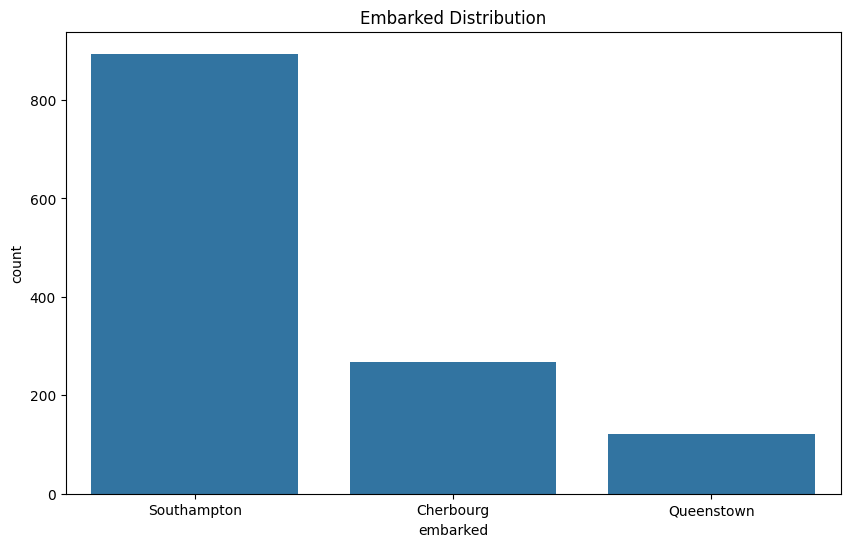

In [18]:
#plot emparked coulmn 
plt.figure(figsize=(10,6))
sns.countplot(x='embarked', data=data)
plt.title('Embarked Distribution')
plt.show()

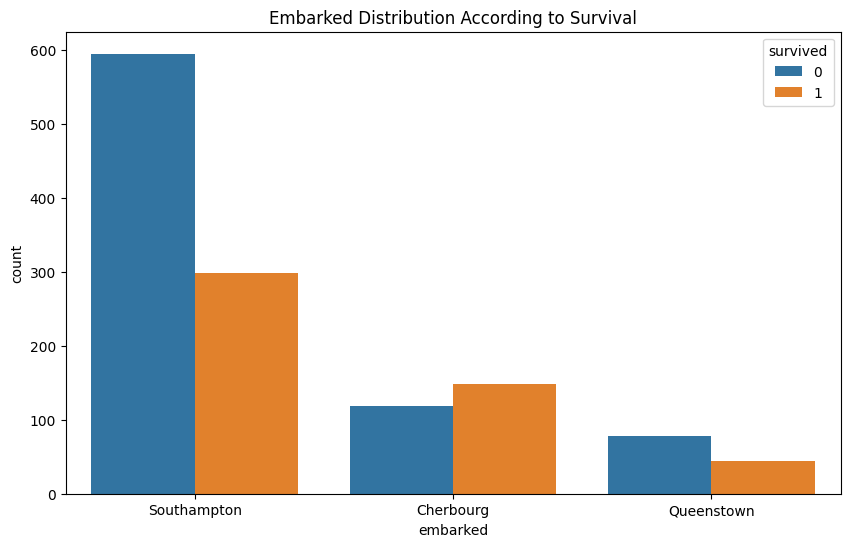

In [19]:
#plot embarked according to survive
plt.figure(figsize=(10,6))
sns.countplot(x='embarked', hue='survived', data=data)
plt.title('Embarked Distribution According to Survival')
plt.show()


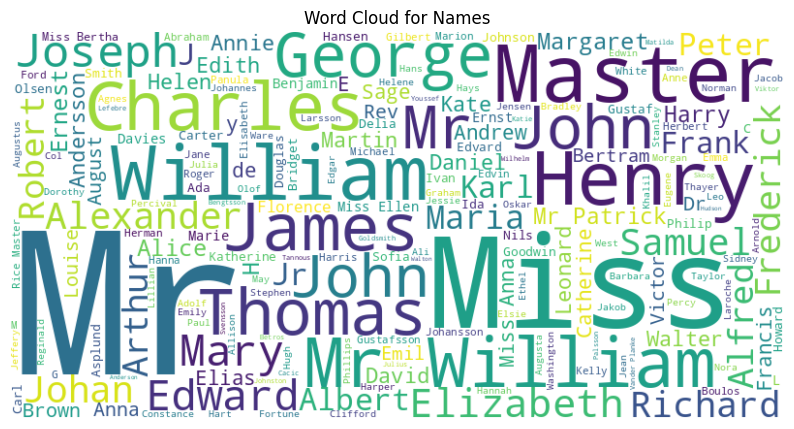

In [20]:
# Combine all names into a single string
names = ' '.join(data['name'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Names')
plt.show()

# Word Cloud for Titanic Passenger Names 🌊🚢

In the previous cell, we generated a word cloud 🌥️ using the names of the passengers from the Titanic dataset. The word cloud visually represents the frequency of names, with larger words indicating names that appear more frequently in the dataset. This is a fun and informative way to see which names were most common among the passengers. 🎉

Here's a breakdown of what we did:

1. **Combined All Names**: We concatenated all the names into a single string. 📜
2. **Generated the Word Cloud**: Using the `WordCloud` class from the `wordcloud` module, we created a word cloud with a white background. 🌟
3. **Plotted the Word Cloud**: Finally, we displayed the word cloud using `matplotlib`. 📊

The resulting word cloud gives us a quick visual insight into the most common names among the Titanic passengers. 🕵️‍♂️

Feel free to explore and analyze the word cloud further! 🔍

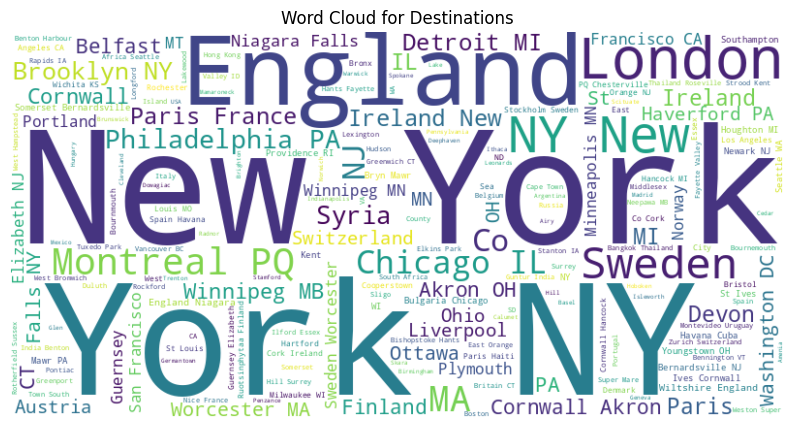

In [21]:
# Combine all destinations into a single string
destinations = ' '.join(data['home.dest'].dropna())

# Generate the word cloud
wordcloud_dest = WordCloud(width=800, height=400, background_color='white').generate(destinations)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_dest, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Destinations')
plt.show()

# Word Cloud Destinations Analysis 📊

This visualization shows a word cloud of various destinations, primarily featuring:

## Key Cities & Regions 🌎
- New York (prominently displayed) 🗽
- London 🇬🇧
- Chicago 🌆
- Montreal 🇨🇦
- Philadelphia 🔔

## Geographic Distribution 🧭
- US locations (MA, IL, PA, NY) 🇺🇸
- European destinations (Paris, Cornwall, Ireland) 🇪🇺
- International cities and regions scattered throughout

## Notable Features 📍
- State abbreviations (MI, IL, PA) frequently appear
- Mix of major cities and smaller towns
- Multiple references to some locations in different formats (e.g., "New York" and "NY")

The word cloud emphasizes English-speaking destinations, with font sizes indicating frequency or importance of these locations in the dataset 📈

In [22]:
data.drop(columns=['boat', 'cabin', 'home.dest', 'name', 'ticket', 'body'], inplace=True)

In [26]:
# Prepare the data for logistic regression
X = data.drop(columns=['survived'])
y = data['survived']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  24]
 [ 34  69]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       154
           1       0.74      0.67      0.70       103

    accuracy                           0.77       257
   macro avg       0.77      0.76      0.76       257
weighted avg       0.77      0.77      0.77       257



# Titanic Dataset Analysis 🚢

## Key Findings

### Survival Patterns 📊
- Overall survival rate: 38% (model accuracy: 77%)
- Logistic regression shows good prediction performance (F1-score: 0.76)

### Passenger Distribution 👥
- Most passengers embarked from Southampton (~850)
- Cherbourg (~250) and Queenstown (~130) had fewer passengers
- Survival rates varied by embarkation point, with Cherbourg showing higher survival proportion

### Demographics 📈
- Age distribution peaks around 20-30 years
- Three passenger classes (1st, 2nd, 3rd) with uneven distribution
- Ticket fares highly skewed, majority under 100 units with outliers up to 500

### Model Performance 🎯
- Precision: 0.79 (Class 0), 0.74 (Class 1)
- Recall: 0.84 (Class 0), 0.67 (Class 1)
- Strong overall classification performance with balanced metrics

This analysis reveals significant patterns in passenger survival based on embarkation point, class, and demographics, with the predictive model showing robust performance. 🎯